# Califronia Real-Estate ML Approximation Model (Santa Brabara County)

## Required Libraries :

In [1]:
# RUN THIS MODULE TO INSTALL REQUIRE LIBRARIES FIRST

!pip install pandas
!pip install sklearn
!pip install math
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install xlrd

## Data Cleaning:

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import libraries need for this project

import pandas as pd
import sklearn
import math
import numpy
import matplotlib
import seaborn as sns

In [4]:
# open excel item

files = 'Santa Barabara.xls'
df = pd.read_excel(files)
df

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,APN,Address,SalePrice,SaleDate,Bedrooms,BathRooms,SqFootage,YearBuilt,YearEff,Acreage,...,SitusUnitType,SitusUnitNum,SitusCity,SitusZip,Location,Point_X,Point_Y,DocType,TRAPrefix,TtlReapprPct
0,001-242-001,"1346 CAMINO TRILLADO \nCARPINTERIA, CA 93013","$1,615,000",03/03/2022,3.0,2.00,1232.0,1962.0,1995.0,0.14,...,NaN,NaN,CARPINTERIA,93013.0,City of Carpinteria,6.105959e+06,1.972036e+06,DEED,5,100.00 %
1,001-242-015,"1349 LA MANIDA \nCARPINTERIA, CA 93013","$1,500,000",01/31/2022,4.0,2.25,1944.0,1961.0,1962.0,0.27,...,NaN,NaN,CARPINTERIA,93013.0,City of Carpinteria,6.106076e+06,1.971997e+06,DEED,5,100.00 %
2,001-242-022,"1306 LA MANIDA \nCARPINTERIA, CA 93013","$1,350,000",11/08/2021,4.0,2.00,1408.0,1961.0,1975.0,0.17,...,NaN,NaN,CARPINTERIA,93013.0,City of Carpinteria,6.106091e+06,1.971538e+06,DEED,5,100.00 %
3,001-271-004,"1483 ALVA ST\nCARPINTERIA, CA 93013","$1,230,000",02/18/2022,3.0,3.00,2338.0,1963.0,2005.0,0.25,...,NaN,NaN,CARPINTERIA,93013.0,City of Carpinteria,6.106322e+06,1.972628e+06,DEED,5,100.00 %
4,001-272-009,"5459 SHEMARA ST\nCARPINTERIA, CA 93013",NaN,10/08/2021,4.0,1.75,1300.0,1963.0,1964.0,0.20,...,NaN,NaN,CARPINTERIA,93013.0,City of Carpinteria,6.106724e+06,1.972279e+06,DIE,5,100.00 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,629-152-060,"1650 CLARK AVE\nSANTA MARIA, CA 93455",NaN,10/29/2021,2.0,2.00,1830.0,1989.0,NaN,0.00,...,NaN,260,SANTA MARIA,93455.0,Orcutt,5.842909e+06,2.144907e+06,MOB,80,100.00 %
2346,637-261-004,"104 SIERRA VISTA \nSOLVANG, CA 93463",NaN,12/15/2021,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,SOLVANG,93463.0,City of Solvang,5.914546e+06,2.044239e+06,MOB,6,100.00 %
2347,641-040-002,"2056 HWY 154 \nSANTA YNEZ, CA 93460",NaN,11/22/2021,2.0,2.00,1606.0,1985.0,NaN,0.00,...,NaN,2,SANTA YNEZ,93460.0,Santa Ynez Valley,5.933651e+06,2.063326e+06,MOB,62,100.00 %
2348,641-040-011,"2056 HWY 154 \nSANTA YNEZ, CA 93460",NaN,01/03/2022,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,11,SANTA YNEZ,93460.0,Santa Ynez Valley,5.933733e+06,2.063390e+06,MOB,62,100.00 %


In [5]:
df.columns

Index(['APN', 'Address', 'SalePrice', 'SaleDate', 'Bedrooms', 'BathRooms',
       'SqFootage', 'YearBuilt', 'YearEff', 'Acreage', 'LotSize', 'PropUse',
       'SitusStreetNum', 'SitusStreetFract', 'SitusStreetDirect',
       'SitusStreetName', 'SitusStreetSuffix', 'SitusUnitType', 'SitusUnitNum',
       'SitusCity', 'SitusZip', 'Location', 'Point_X', 'Point_Y', 'DocType',
       'TRAPrefix', 'TtlReapprPct'],
      dtype='object')

In [6]:
# select data we going to use for the model

dfselect = df[['Bedrooms','BathRooms', 'SqFootage', 'YearBuilt', 'YearEff','LotSize','PropUse','SitusCity','SalePrice']]
dfselect

,Bedrooms,BathRooms,SqFootage,YearBuilt,YearEff,LotSize,PropUse,SitusCity,SalePrice
0,3.0,2.00,1232.0,1962.0,1995.0,6098.4,Single Family Residence,CARPINTERIA,"$1,615,000"
1,4.0,2.25,1944.0,1961.0,1962.0,11761.2,Single Family Residence,CARPINTERIA,"$1,500,000"
2,4.0,2.00,1408.0,1961.0,1975.0,7405.2,Single Family Residence,CARPINTERIA,"$1,350,000"
3,3.0,3.00,2338.0,1963.0,2005.0,10890.0,Single Family Residence,CARPINTERIA,"$1,230,000"
4,4.0,1.75,1300.0,1963.0,1964.0,8712.0,Single Family Residence,CARPINTERIA,NaN
...,...,...,...,...,...,...,...,...,...
2345,2.0,2.00,1830.0,1989.0,NaN,0.0,Mobile Home,SANTA MARIA,NaN
2346,NaN,NaN,NaN,NaN,NaN,0.0,Mobile Home,SOLVANG,NaN
2347,2.0,2.00,1606.0,1985.0,NaN,0.0,Mobile Home,SANTA YNEZ,NaN
2348,NaN,NaN,NaN,NaN,NaN,0.0,Mobile Home,SANTA YNEZ,NaN


In [7]:
# there are alot of null data, since data size is good, we'll drop all the null
# SalesPrice column needs to convert from str to int
# 7 digit millions is too long to work with, we'll reduce to K, Ex: 1M -> 1000K

cleandf = dfselect.dropna()
cleandf['SalePrice'] = cleandf['SalePrice'].replace("[$,]", "", regex=True).astype(int)
cleandf['SalePrice K'] = cleandf['SalePrice']/1000
cleandf = cleandf.drop(columns=['SalePrice'])
cleandf

,Bedrooms,BathRooms,SqFootage,YearBuilt,YearEff,LotSize,PropUse,SitusCity,SalePrice K
0,3.0,2.00,1232.0,1962.0,1995.0,6098.40,Single Family Residence,CARPINTERIA,1615.0
1,4.0,2.25,1944.0,1961.0,1962.0,11761.20,Single Family Residence,CARPINTERIA,1500.0
2,4.0,2.00,1408.0,1961.0,1975.0,7405.20,Single Family Residence,CARPINTERIA,1350.0
3,3.0,3.00,2338.0,1963.0,2005.0,10890.00,Single Family Residence,CARPINTERIA,1230.0
5,4.0,1.75,1300.0,1963.0,1964.0,8712.00,Single Family Residence,CARPINTERIA,1382.5
...,...,...,...,...,...,...,...,...,...
2279,3.0,4.00,5241.0,2001.0,2001.0,1093791.60,Single Family Residence,SANTA BARBARA,6785.0
2280,3.0,3.00,3904.0,1973.0,1990.0,63162.00,Single Family Residence,SANTA BARBARA,4975.0
2281,4.0,4.00,3299.0,1996.0,1996.0,41251.32,Single Family Residence,SANTA BARBARA,4100.0
2282,1.0,1.00,860.0,1965.0,1966.0,48787.20,Single Family Residence,SANTA BARBARA,2650.0


In [8]:
cleandf.isnull().sum()

Bedrooms       0
BathRooms      0
SqFootage      0
YearBuilt      0
YearEff        0
LotSize        0
PropUse        0
SitusCity      0
SalePrice K    0
dtype: int64

In [9]:
cleandf['PropUse'].value_counts()

Single Family Residence    1457
Condominium                 414
Residential 2-4 Units        18
Vacant Residential Land       1
Name: PropUse, dtype: int64

In [10]:
# Vacant Land is irrelevant for this project, we'll drop it

cleandf = cleandf[cleandf['PropUse']!='Vacant Residential Land']
cleandf['PropUse'].value_counts()

Single Family Residence    1457
Condominium                 414
Residential 2-4 Units        18
Name: PropUse, dtype: int64

In [11]:
cleandf['SalePrice K']

0       1615.0
1       1500.0
2       1350.0
3       1230.0
5       1382.5
         ...  
2279    6785.0
2280    4975.0
2281    4100.0
2282    2650.0
2284    5250.0
Name: SalePrice K, Length: 1889, dtype: float64

## Explore Data:

In [12]:
cleandf['SalePrice K'].describe()

count     1889.000000
mean      1421.361302
std       2814.483313
min         79.500000
25%        520.000000
50%        720.000000
75%       1425.000000
max      55000.000000
Name: SalePrice K, dtype: float64

<AxesSubplot:>

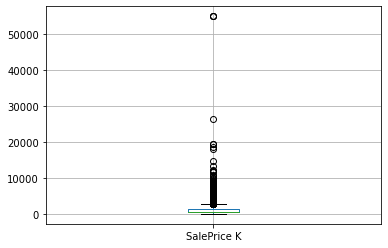

In [13]:
cleandf.boxplot(column=['SalePrice K']) 

In [14]:
cleandf[cleandf['SalePrice K']>50000]

,Bedrooms,BathRooms,SqFootage,YearBuilt,YearEff,LotSize,PropUse,SitusCity,SalePrice K
197,3.0,3.0,3127.0,2012.0,2012.0,44431.20,Single Family Residence,SANTA BARBARA,55000.0
198,1.0,2.0,4491.0,2012.0,2012.0,43560.00,Single Family Residence,SANTA BARBARA,55000.0
199,3.0,5.0,9060.0,2016.0,2017.0,98619.84,Single Family Residence,SANTA BARBARA,55000.0


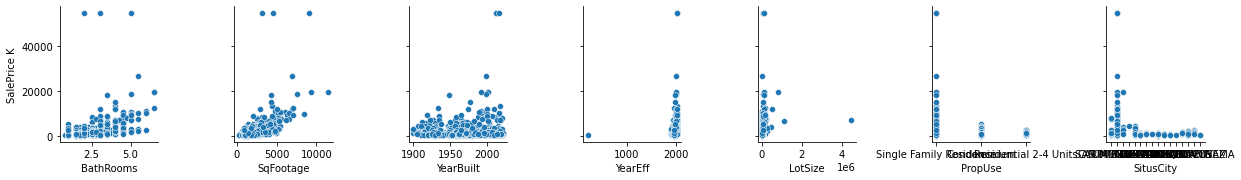

In [15]:
sns.pairplot(cleandf,x_vars=['BathRooms', 'SqFootage', 'YearBuilt', 'YearEff','LotSize','PropUse','SitusCity'], y_vars=['SalePrice K'],)

In [16]:
# these 3 houses at 55 million is outliers that can skew the study, we'll drop it

cleandf = cleandf[cleandf['SalePrice K']<50000]

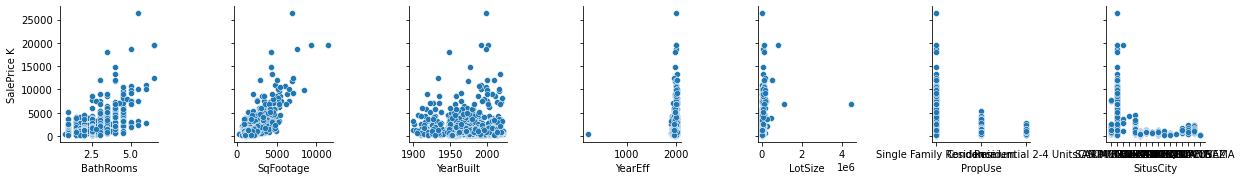

In [17]:
# there is some kind of pattern in all this variables, but there is a few outlier falling outside the pattern in above 40 million range
# it is best to drop those as well, since we only interest to capture the pattern to formulate the hosuing price

cleandf = cleandf[cleandf['SalePrice K']<40000]
sns.pairplot(cleandf,x_vars=['BathRooms', 'SqFootage', 'YearBuilt', 'YearEff','LotSize','PropUse','SitusCity'], y_vars=['SalePrice K'],)

In [18]:
# after all the filter we still have 1886 data to train the model

len(cleandf)

1886

## Features Engineering (Standardization & One-hot-encdoing):

In [19]:
# one-hot-encoding
onehotdf = pd.get_dummies(cleandf, columns=['PropUse', 'SitusCity'], drop_first=True)
onehotdf

,Bedrooms,BathRooms,SqFootage,YearBuilt,YearEff,LotSize,SalePrice K,PropUse_Residential 2-4 Units,PropUse_Single Family Residence,SitusCity_CARPINTERIA,...,SitusCity_LOS OLIVOS,SitusCity_MONTECITO,SitusCity_NEW CUYAMA,SitusCity_ORCUTT,SitusCity_SANTA BARBARA,SitusCity_SANTA MARIA,SitusCity_SANTA YNEZ,SitusCity_SISQUOC,SitusCity_SOLVANG,SitusCity_SUMMERLAND
0,3.0,2.00,1232.0,1962.0,1995.0,6098.40,1615.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2.25,1944.0,1961.0,1962.0,11761.20,1500.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,4.0,2.00,1408.0,1961.0,1975.0,7405.20,1350.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.00,2338.0,1963.0,2005.0,10890.00,1230.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,4.0,1.75,1300.0,1963.0,1964.0,8712.00,1382.5,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,3.0,4.00,5241.0,2001.0,2001.0,1093791.60,6785.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2280,3.0,3.00,3904.0,1973.0,1990.0,63162.00,4975.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2281,4.0,4.00,3299.0,1996.0,1996.0,41251.32,4100.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2282,1.0,1.00,860.0,1965.0,1966.0,48787.20,2650.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
onehotdf.columns

Index(['Bedrooms', 'BathRooms', 'SqFootage', 'YearBuilt', 'YearEff', 'LotSize',
       'SalePrice K', 'PropUse_Residential 2-4 Units',
       'PropUse_Single Family Residence', 'SitusCity_CARPINTERIA',
       'SitusCity_GOLETA', 'SitusCity_GUADALUPE', 'SitusCity_LOMPOC',
       'SitusCity_LOS ALAMOS', 'SitusCity_LOS OLIVOS', 'SitusCity_MONTECITO',
       'SitusCity_NEW CUYAMA', 'SitusCity_ORCUTT', 'SitusCity_SANTA BARBARA',
       'SitusCity_SANTA MARIA', 'SitusCity_SANTA YNEZ', 'SitusCity_SISQUOC',
       'SitusCity_SOLVANG', 'SitusCity_SUMMERLAND'],
      dtype='object')

In [21]:
x_data = onehotdf.drop(columns=['SalePrice K'])
y_data = onehotdf['SalePrice K']

# data standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_data)

In [22]:
scaler.transform(x_data)

array([[-0.0986354 , -0.30840813, -0.63658316, ..., -0.02303267,
        -0.16671207, -0.05649327],
       [ 0.98291322,  0.00297181,  0.123825  , ..., -0.02303267,
        -0.16671207, -0.05649327],
       [ 0.98291322, -0.30840813, -0.4486171 , ..., -0.02303267,
        -0.16671207, -0.05649327],
       ...,
       [ 0.98291322,  2.1826314 ,  1.57095007, ..., -0.02303267,
        -0.16671207, -0.05649327],
       [-2.26173263, -1.55392789, -1.03387506, ..., -0.02303267,
        -0.16671207, -0.05649327],
       [ 0.98291322,  1.55987152,  2.42000132, ..., -0.02303267,
        -0.16671207, -0.05649327]])

## Train & Test Split -> Fit the Model

In [23]:
# test & train split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=30)

In [24]:
# fit the data

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

## Evaluate the Model:

In [25]:
# compare prediction values to the actual values

y_prediction =  LR.predict(x_test)
y_comparedf = pd.DataFrame({'y-hat':y_prediction.round(),'y_test':y_test})
y_comparedf

,y-hat,y_test
1764,1030.0,630.0
1904,237.0,501.0
516,1618.0,2580.0
764,1290.0,1300.0
1737,2623.0,895.0
...,...,...
1710,949.0,433.5
1848,49.0,282.0
346,1097.0,939.0
1704,627.0,743.0


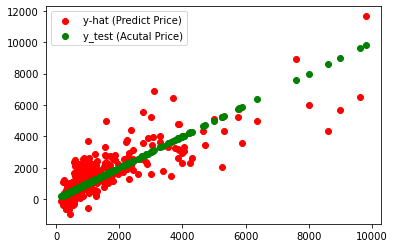

In [26]:
# visualize the difference

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x = y_comparedf['y_test'],y = y_comparedf['y-hat'],label='y-hat (Predict Price)', c='red')
plt.scatter(x = y_comparedf['y_test'],y = y_comparedf['y_test'],label='y_test (Acutal Price)', c='green')
plt.legend()

In [27]:
# R-squared value of the model

LR.score(x_test, y_test)

0.6488986184301333

In [28]:
# all coeffiecents values

LR.coef_

array([-3.85553787e+02,  9.85009318e+01,  1.47897148e+00, -5.41361401e+00,
        1.45814944e-01,  6.33656409e-05, -8.43620452e+01,  2.00627883e+02,
        7.21652808e+02,  3.96556498e+02,  1.13603102e+02, -2.95291631e+02,
       -3.32106896e+02, -2.09583722e+01,  4.54747351e-13, -2.44590558e+02,
       -7.03193970e+02,  9.81224869e+02, -3.19586929e+02, -2.96388423e+02,
       -4.55655136e+01, -5.22387115e+02,  3.65162382e+03])

In [29]:
# all coeffiecents names

x_data.columns

Index(['Bedrooms', 'BathRooms', 'SqFootage', 'YearBuilt', 'YearEff', 'LotSize',
       'PropUse_Residential 2-4 Units', 'PropUse_Single Family Residence',
       'SitusCity_CARPINTERIA', 'SitusCity_GOLETA', 'SitusCity_GUADALUPE',
       'SitusCity_LOMPOC', 'SitusCity_LOS ALAMOS', 'SitusCity_LOS OLIVOS',
       'SitusCity_MONTECITO', 'SitusCity_NEW CUYAMA', 'SitusCity_ORCUTT',
       'SitusCity_SANTA BARBARA', 'SitusCity_SANTA MARIA',
       'SitusCity_SANTA YNEZ', 'SitusCity_SISQUOC', 'SitusCity_SOLVANG',
       'SitusCity_SUMMERLAND'],
      dtype='object')

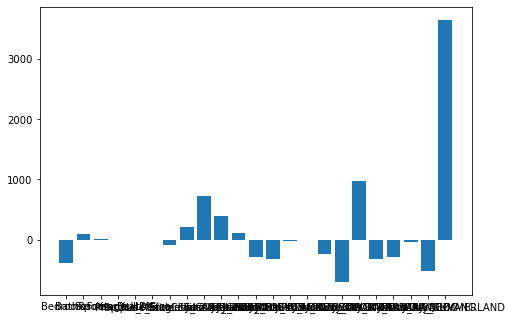

In [30]:
# visualize the coeffiecents

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_cols = x_data.columns
ax.bar(x_cols,LR.coef_)
plt.show()

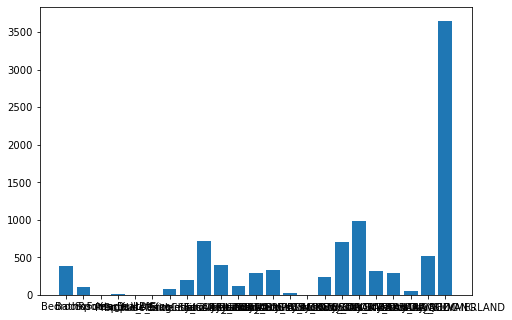

In [31]:
# convert coefficients to absolute value for easier comparsion

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_cols = x_data.columns
ax.bar(x_cols,abs(LR.coef_))
plt.show()

In [32]:
# sort the list from most influential factor to least

coef_df = pd.DataFrame({"Factors":x_cols,"Coefficients":abs(LR.coef_)})
coef_df.sort_values(by = 'Coefficients', ascending = False).reset_index(drop=True)

,Factors,Coefficients
0,SitusCity_SUMMERLAND,3.651624e+03
1,SitusCity_SANTA BARBARA,9.812249e+02
2,SitusCity_CARPINTERIA,7.216528e+02
3,SitusCity_ORCUTT,7.031940e+02
4,SitusCity_SOLVANG,5.223871e+02
5,SitusCity_GOLETA,3.965565e+02
6,Bedrooms,3.855538e+02
7,SitusCity_LOS ALAMOS,3.321069e+02
8,SitusCity_SANTA MARIA,3.195869e+02
9,SitusCity_SANTA YNEZ,2.963884e+02


In [33]:
# let's summarize the location & properties type factors by taken their average

coef_summary_df = coef_df[0:6]
proptype_mean = coef_df[6:8]['Coefficients'].mean()
location_mean = coef_df[8:]['Coefficients'].mean()
coef_summary_df = coef_summary_df.append({'Factors':'PropType','Coefficients':proptype_mean}, ignore_index=True)
coef_summary_df = coef_summary_df.append({'Factors':'Location','Coefficients':location_mean}, ignore_index=True)
coef_summary_df

,Factors,Coefficients
0,Bedrooms,385.553787
1,BathRooms,98.500932
2,SqFootage,1.478971
3,YearBuilt,5.413614
4,YearEff,0.145815
5,LotSize,0.000063
6,PropType,142.494964
7,Location,576.315367


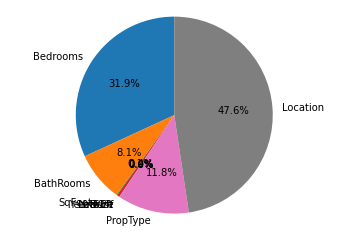

In [34]:
# pie chart visualization to interpret the importance of differnet factors

labels = coef_summary_df['Factors']
values = coef_summary_df['Coefficients']

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels,autopct='%1.1f%%', startangle=90 )
ax1.axis('equal')
plt.show()

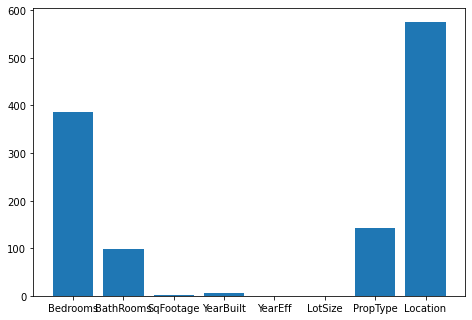

In [35]:
# bar chart perspective

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_cols = coef_summary_df['Factors']
ax.bar(x_cols,coef_summary_df['Coefficients'])
plt.show()

In [36]:
# top 5 most influential factors

coef_summary_df.sort_values(by = 'Coefficients', ascending = False).reset_index(drop=True).head()

,Factors,Coefficients
0,Location,576.315367
1,Bedrooms,385.553787
2,PropType,142.494964
3,BathRooms,98.500932
4,YearBuilt,5.413614


In [37]:
# top least influential factors

coef_summary_df.sort_values(by = 'Coefficients', ascending = True).reset_index(drop=True)[0:1]

,Factors,Coefficients
0,LotSize,0.000063


## User Application Interface:

In [ ]:
# Application Interface

print('---------- APPLICATION INTERFACE ---------- ')
print('How many Bedrooms?(int)')
bedroom = int(input())
print('How many Bathrooms?(int or float)')
bathroom = float(input())
print('What is the Sqfootage?(int)')
sqft = int(input())
print('What is the lot size footage?(int)')
lotsize = int(input())
print('Enter 1 for Single Family Residence, 2 for Residential 2-4 Units:')
prop = int(input())
print('Enter the number of which city, 1:CARPINTERIA, 2:GOLETA, 3:GUADALUPE, 4:LOMPOC, 5:ALAMOS, 6:LOS OLIVOS, 7:MONTECITO, 8:NEW CUYAMA, 9:ORCUTT, 10:SANTA BARBARA, 11:SANTA MARIA, 12:SANTA YNEZ, 13:SISQUOC, 14:SOLVANG, 15:SUMMERLAND')
city = int(input())
print('Enter Year Built:(int)')
yearbuilt = int(input())
print('Enter Effective Year:(int)')
yeareff = int(input())
print('---------- MODEL RESULTS ---------- ')

if city == 1:
    cityvalue = 'CARPINTERIA'
elif city == 2:
    cityvalue = 'GOLETA'
elif city == 3:
    cityvalue = 'GUADALUPE'
elif city == 4:
    cityvalue = 'LOMPOC'
elif city == 5:
    cityvalue = 'ALAMOS'
elif city == 6:
    cityvalue = 'LOS OLIVOS'
elif city == 7:
    cityvalue = 'MONTECITO'   
elif city == 8:
    cityvalue = 'NEW CUYAMA'   
elif city == 9:
    cityvalue = 'ORCUTT'   
elif city == 10:
    cityvalue = 'SANTA BARBARA'   
elif city == 11:
    cityvalue = 'SANTA MARIA'
elif city == 12:
    cityvalue = 'SANTA YNEZ'
elif city == 13:
    cityvalue = 'SISQUOC'
elif city == 14:
    cityvalue = 'SOLVANG'
elif city == 15:
    cityvalue = 'SUMMERLAND'

if prop == 1:
    propvalue = 'Single Family Residence'
elif prop == 2:
    propvalue = 'Residential 2-4 Units'
    
new_row = {'Bedrooms': bedroom, 'BathRooms': bathroom, 'SqFootage': sqft, 'YearBuilt': yearbuilt, 'YearEff': yeareff,'LotSize': lotsize,'PropUse': propvalue,'SitusCity': cityvalue,'SalePrice K': 0}
cleandf = cleandf.append(new_row, ignore_index=True)
onehotdf = pd.get_dummies(cleandf, columns=['PropUse', 'SitusCity'], drop_first=True)
newx_data = onehotdf.drop(columns=['SalePrice K']).iloc[-1]
userxdata = scaler.transform([newx_data.to_numpy()])
yhatprice = LR.predict(userxdata)[0].round()
print('The Model Prediction Price is '+ "${:,.2f}".format(yhatprice*100))


---------- APPLICATION INTERFACE ---------- 
How many Bedrooms?(int)
